#**Dataset**

##Downloading the dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cp /content/drive/MyDrive/Kaggle/kaggle.json ./

In [3]:
import os

if not os.path.isfile("kaggle.json"):
    raise FileNotFoundError("The 'kaggle.json' file is not found in the current directory. Upload the file to download the dataset")

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 96.0MB/s]


In [6]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##Reading the data

In [84]:
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle

In [85]:
df = pd.read_csv("/content/train.csv")

In [86]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##Data Preprocessing

###Checking for NaN values (My Own Analysis)

In [89]:
df['LotFrontage'].isna

<bound method Series.isna of 0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64>

In [90]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(),'data_type': df.dtypes})
display(missing_data)

,total_missing,data_type
Id,0,int64
MSSubClass,0,int64
MSZoning,0,object
LotFrontage,259,float64
LotArea,0,int64
...,...,...
MoSold,0,int64
YrSold,0,int64
SaleType,0,object
SaleCondition,0,object


In [91]:
missing_data.iloc[50:,:]

,total_missing,data_type
HalfBath,0,int64
BedroomAbvGr,0,int64
KitchenAbvGr,0,int64
KitchenQual,0,object
TotRmsAbvGrd,0,int64
Functional,0,object
Fireplaces,0,int64
FireplaceQu,690,object
GarageType,81,object
GarageYrBlt,81,float64


In [92]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [93]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [94]:
null_indices = df[df['MasVnrType'].isnull()].index #Masonry veneer type
null_indices

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

In [95]:
df.loc[null_indices,'MasVnrArea'] # as Masonry veneer type is Null, its area is also null

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [96]:
df[df['BsmtExposure'].isnull()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [97]:
not_common = df[df['BsmtFinType2'].isnull()].index.difference(df[df['BsmtExposure'].isnull()].index)

# Print the result
print(not_common)

Int64Index([332], dtype='int64')


In [98]:
df.loc[not_common,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
332,Gd,TA,No,GLQ,1124,NaN


In [99]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [100]:
df.loc[df[df['BsmtExposure'].isnull()].index,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]].style.highlight_null("red")
# BsmtQual	37	object
# BsmtCond	37	object
# BsmtExposure	38	object - no basement
# BsmtFinType1	37	object
# BsmtFinSF1	0	int64
# BsmtFinType2	38

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,nan,nan,nan,nan,0,nan
39,nan,nan,nan,nan,0,nan
90,nan,nan,nan,nan,0,nan
102,nan,nan,nan,nan,0,nan
156,nan,nan,nan,nan,0,nan
182,nan,nan,nan,nan,0,nan
259,nan,nan,nan,nan,0,nan
342,nan,nan,nan,nan,0,nan
362,nan,nan,nan,nan,0,nan
371,nan,nan,nan,nan,0,nan


In [101]:
len(df.loc[df[df['BsmtExposure'].isnull()].index,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]])

38

In [102]:
for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
  print(col+" : "+str(df[col].unique()))


# df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]]

BsmtQual : ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond : ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure : ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 : ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [103]:
df.loc[df[df['FireplaceQu'].isnull()].index,["Fireplaces","FireplaceQu"]].style.highlight_null("red")

,Fireplaces,FireplaceQu
0,0,nan
5,0,nan
10,0,nan
12,0,nan
15,0,nan
17,0,nan
18,0,nan
19,0,nan
26,0,nan
29,0,nan


In [104]:
display(df.loc[df[df["GarageType"].isnull()].index,['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageCars','GarageQual','GarageCond']])

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageCars,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [105]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

### Common function to prepare the dataset (Train & Test)

In [106]:
from sklearn.preprocessing import OrdinalEncoder
import os

def prepare_dataset(df:pd.DataFrame,encode=True)-> pd.DataFrame:
  """
  Function to prepare the dataset for training and testing.
  Performs label encoding or inverse label encoding, filling of missing values, and removal of unwanted columns.

  Args:
      df (pd.DataFrame): The input DataFrame to be preprocessed.
      encode (bool): A flag that determines whether to perform label encoding or inverse label encoding on the input DataFrame. Defaults to True.

  Returns:
      pd.DataFrame: The preprocessed DataFrame.
  """
  if encode:
    df = removeUnwanted(LabelEncode(fillNaN(df))) #performs label encoding
  else:
    df = removeUnwanted(decodeLabelEncode(fillNaN(df))) #performs inverse transform
  return df


def removeUnwanted(df:pd.DataFrame)-> pd.DataFrame:
  """
  Function to remove unwanted columns from the input DataFrame.

  Args:
      df (pd.DataFrame): The input DataFrame.

  Returns:
      pd.DataFrame: The DataFrame with the column 'GarageYrBlt' removed.
  """
  df = df.drop(columns=['GarageYrBlt'],errors="ignore")
  return df


def LabelEncode(df:pd.DataFrame)-> pd.DataFrame:
  """
  Function to perform label encoding on the input DataFrame.

  Args:
      df (pd.DataFrame): The input DataFrame.

  Returns:
      pd.DataFrame: The label-encoded DataFrame.
  """
  # Separate numeric and object type columns
  numeric_columns = df.select_dtypes(include='number')
  object_columns = df.select_dtypes(include='object')

  # Create a dummy row with zero values for numeric columns and "0" values for object columns
  dummy_row = pd.DataFrame([[0] * len(numeric_columns.columns) + ["0"] * len(object_columns.columns)], columns=numeric_columns.columns.tolist() + object_columns.columns.tolist())

  # Append the dummy row to the DataFrame
  df = df.append(dummy_row, ignore_index=True)

  # Separate numeric and object type columns
  numeric_columns = df.select_dtypes(include='number')
  object_columns = df.select_dtypes(include='object')

  if os.path.exists('data/encoders.pickle'):
    with open('data/encoders.pickle', 'rb') as f:
        encoder = pickle.load(f)
        try:
          print("Transform")
          object_columns_encoded = encoder.transform(object_columns)
        except Exception as e:
          raise e
  else:
    encoder = OrdinalEncoder()
    try:
      print("Fit Transform")
      object_columns_encoded = encoder.fit_transform(object_columns)
    except Exception as e:
      raise e

  try:
    object_columns_encoded = pd.DataFrame(object_columns_encoded, columns=object_columns.columns)
  except Exception as e:
    print(e)

  # Concatenate numeric and encoded object type columns
  df_encoded = pd.concat([numeric_columns, object_columns_encoded], axis=1)

  # Create the directory if it doesn't exist
  directory = 'data'
  if not os.path.exists(directory):
      os.makedirs(directory)

  # Save the encoder object as a pickle file
  with open(os.path.join(directory, 'encoders.pickle'), 'wb') as f:
      pickle.dump(encoder, f)

  return df_encoded[:-1] #removing the dummy row used for encoding.


def fillNaN(df:pd.DataFrame)-> pd.DataFrame:
  """
  Function to fill missing values in the input DataFrame.

  Args:
      df (pd.DataFrame): The input DataFrame.

  Returns:
      pd.DataFrame: The DataFrame with missing values filled.
  """

  df['Alley'].fillna("0", inplace=True)
  df['MasVnrType'].fillna("0", inplace=True)
  df['BsmtQual'].fillna("0", inplace=True)
  df['BsmtCond'].fillna("0", inplace=True)
  df['BsmtExposure'].fillna("0", inplace=True)
  df['BsmtFinType1'].fillna("0", inplace=True)
  df['BsmtFinType2'].fillna("0", inplace=True)

  df['LotFrontage'].fillna(0, inplace=True) #na values of lot frontage will be replaced with zero. This should be replaced with zero, else encoder will through an error.
  df['MasVnrArea'].fillna(0, inplace=True) #na values of MasVnrArea will be replaced with zero as its Masonry veneer type is null

  df['Electrical'].fillna("0", inplace=True)
  df['FireplaceQu'].fillna("0", inplace=True)

  df['GarageType'].fillna("0", inplace=True)
  df['GarageFinish'].fillna("0", inplace=True)
  df['GarageQual'].fillna("0", inplace=True)
  df['GarageCond'].fillna("0", inplace=True)

  df['PoolQC'].fillna("0",inplace=True)
  df['Fence'].fillna("0",inplace=True)
  df['MiscFeature'].fillna("0", inplace=True)

  return df


def decodeLabelEncode(df:pd.DataFrame)-> pd.DataFrame:
  """
  Function to perform the inverse label encoding on the input DataFrame.

  Args:
      df (pd.DataFrame): The input DataFrame.

  Returns:
      pd.DataFrame: The DataFrame with the original values of the categorical variables restored.
  """
  # Separate numeric and object type columns
  with open('data/encoders.pickle', 'rb') as f:
      encoder = pickle.load(f)

  object_columns = df[encoder.feature_names_in_]
  numeric_columns = df[df.columns.difference(encoder.feature_names_in_)]
  print(f"Total columns: {len(object_columns.columns)+len(numeric_columns.columns)}")

  decoded = encoder.inverse_transform(object_columns)
  decoded = pd.DataFrame(decoded,columns=object_columns.columns)

  # Concatenate numeric and encoded object type columns
  df_decoded = pd.concat([numeric_columns, decoded], axis=1)

  return df_decoded

In [107]:
df_test = prepare_dataset(df.copy())

Transform


<ipython-input-106-ecc33dc26803>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dummy_row, ignore_index=True)


In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

## EDA

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
# numeric_columns.remove('Id')
# numeric_columns.remove('SalePrice')
numeric_columns.remove('GarageYrBlt')

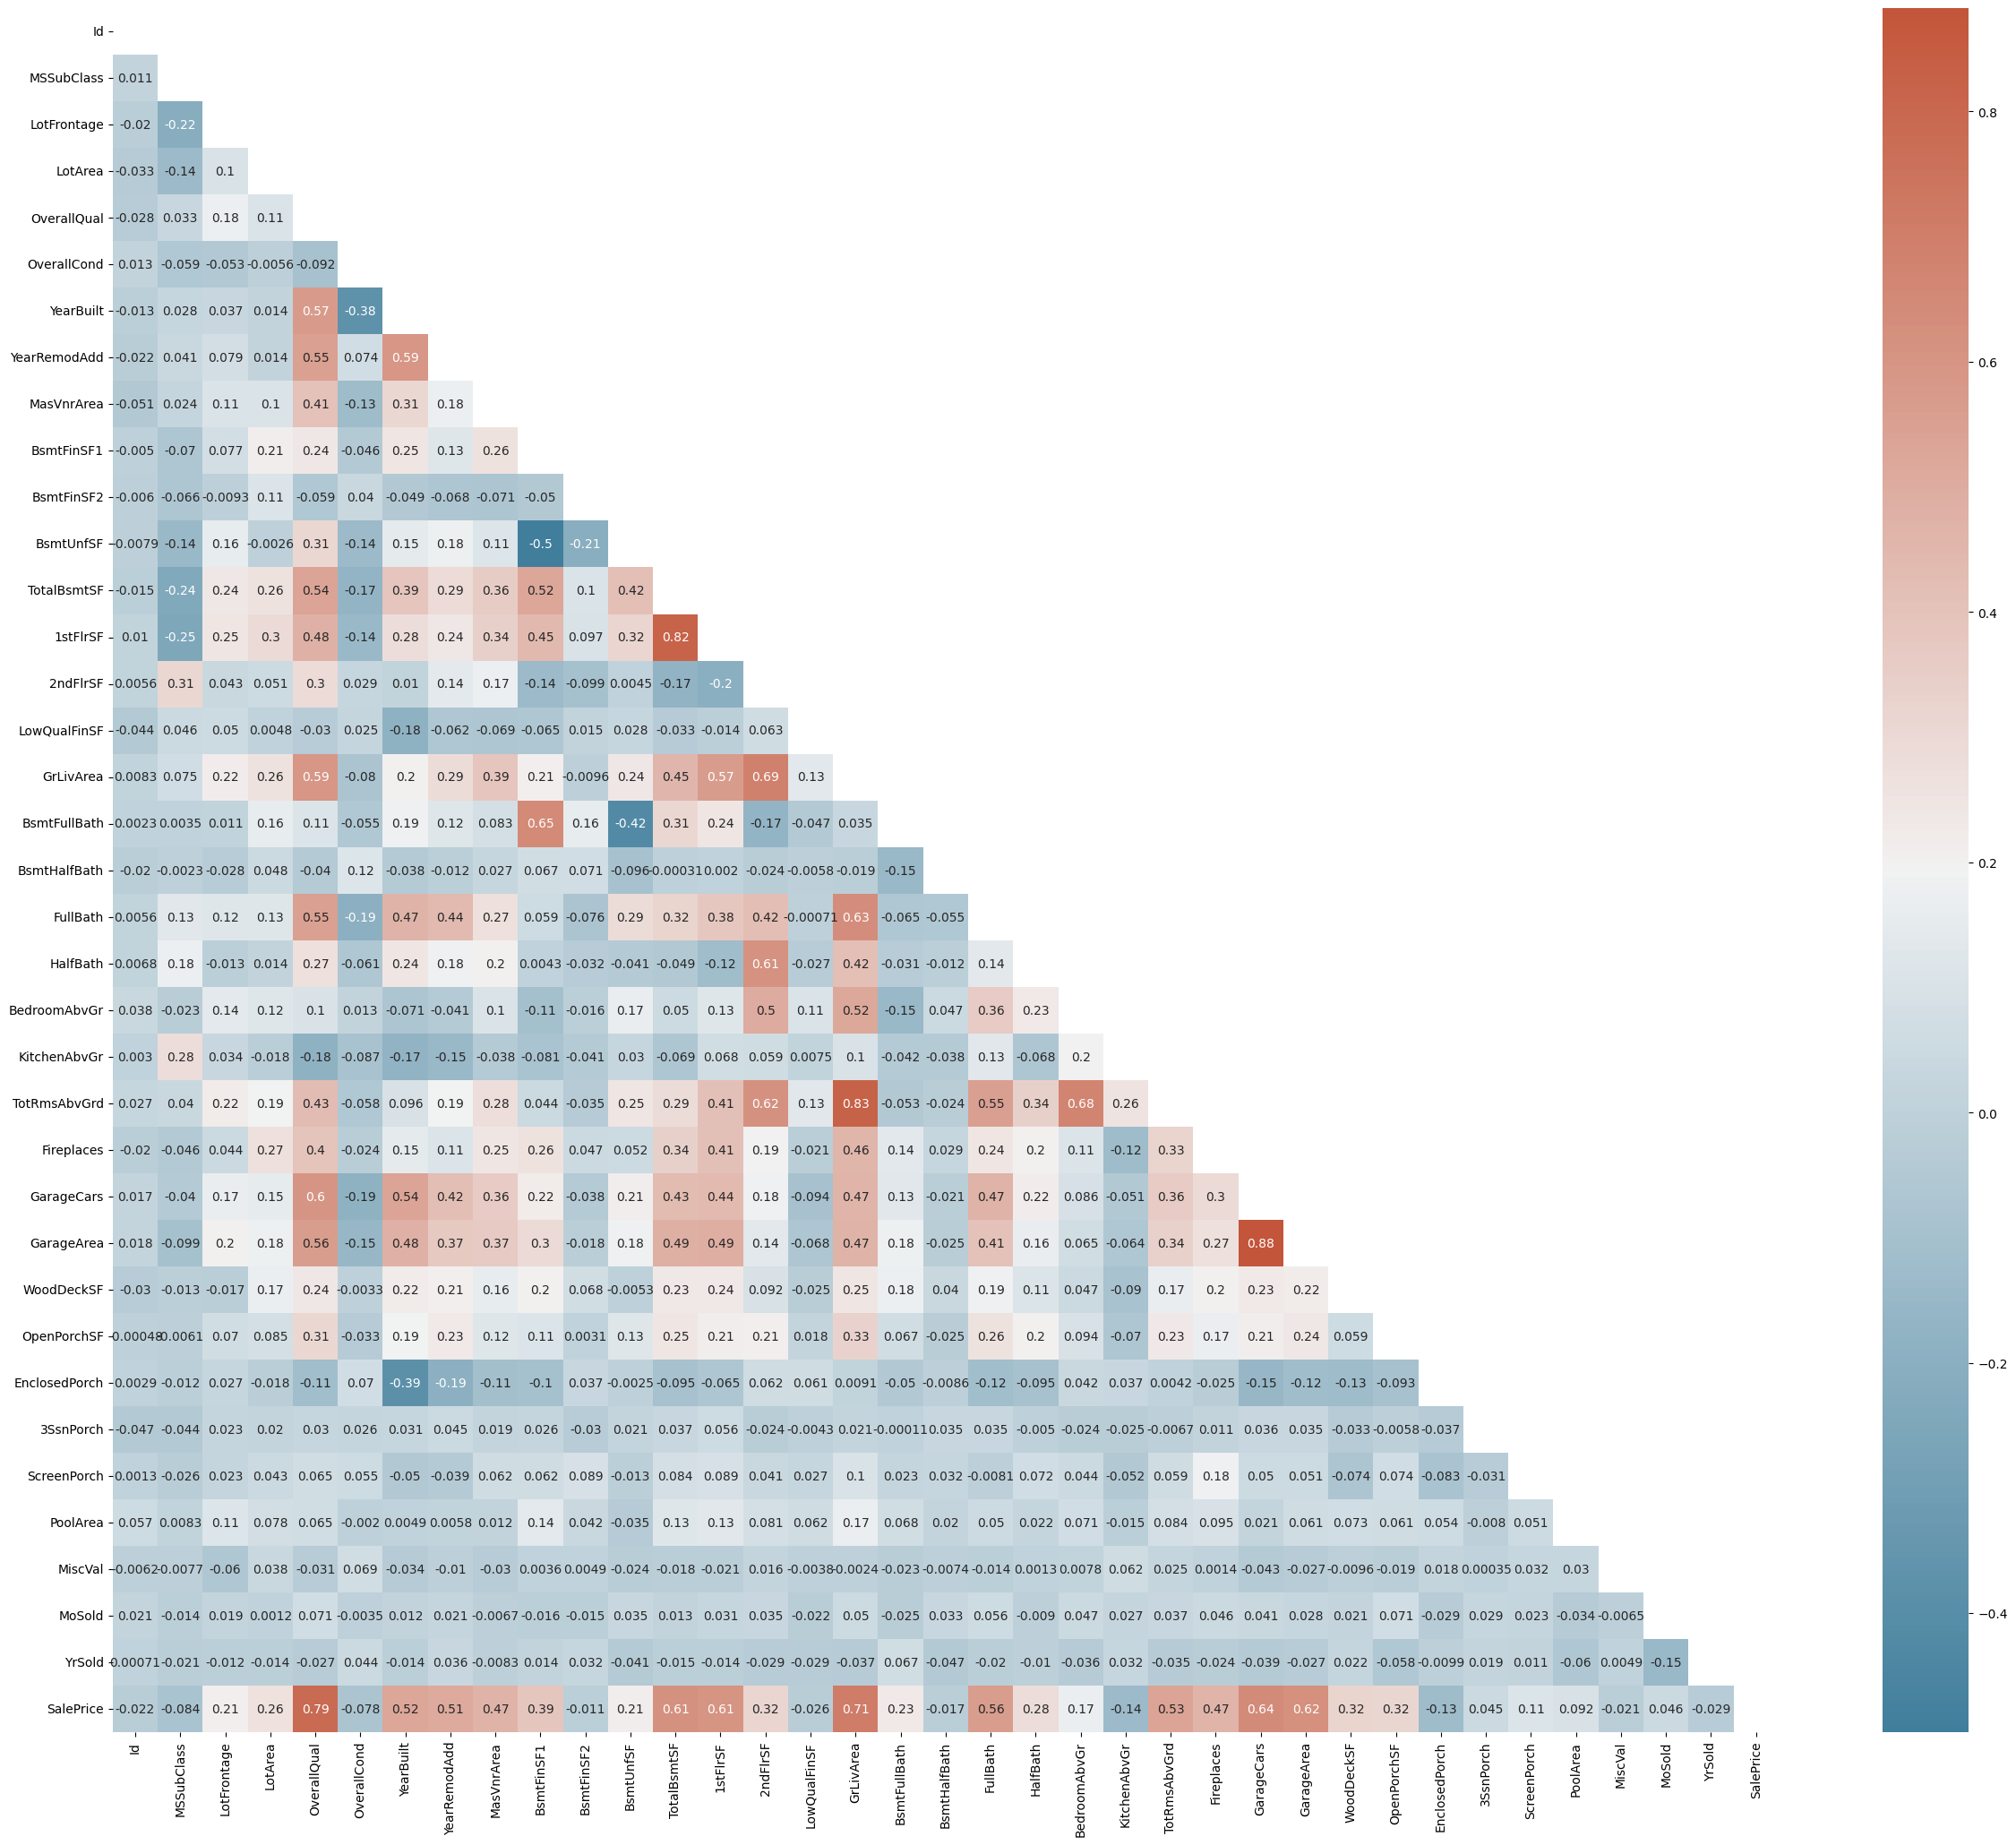

In [ ]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

f, ax = plt.subplots(figsize=(30, 25))

# plotting correlation heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mat = df_test[numeric_columns].corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))

dataplot=sns.heatmap(data=mat,mask=mask,cmap=cmap,annot=True)

# displaying heatmap
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_test.boxplot(by='Id')

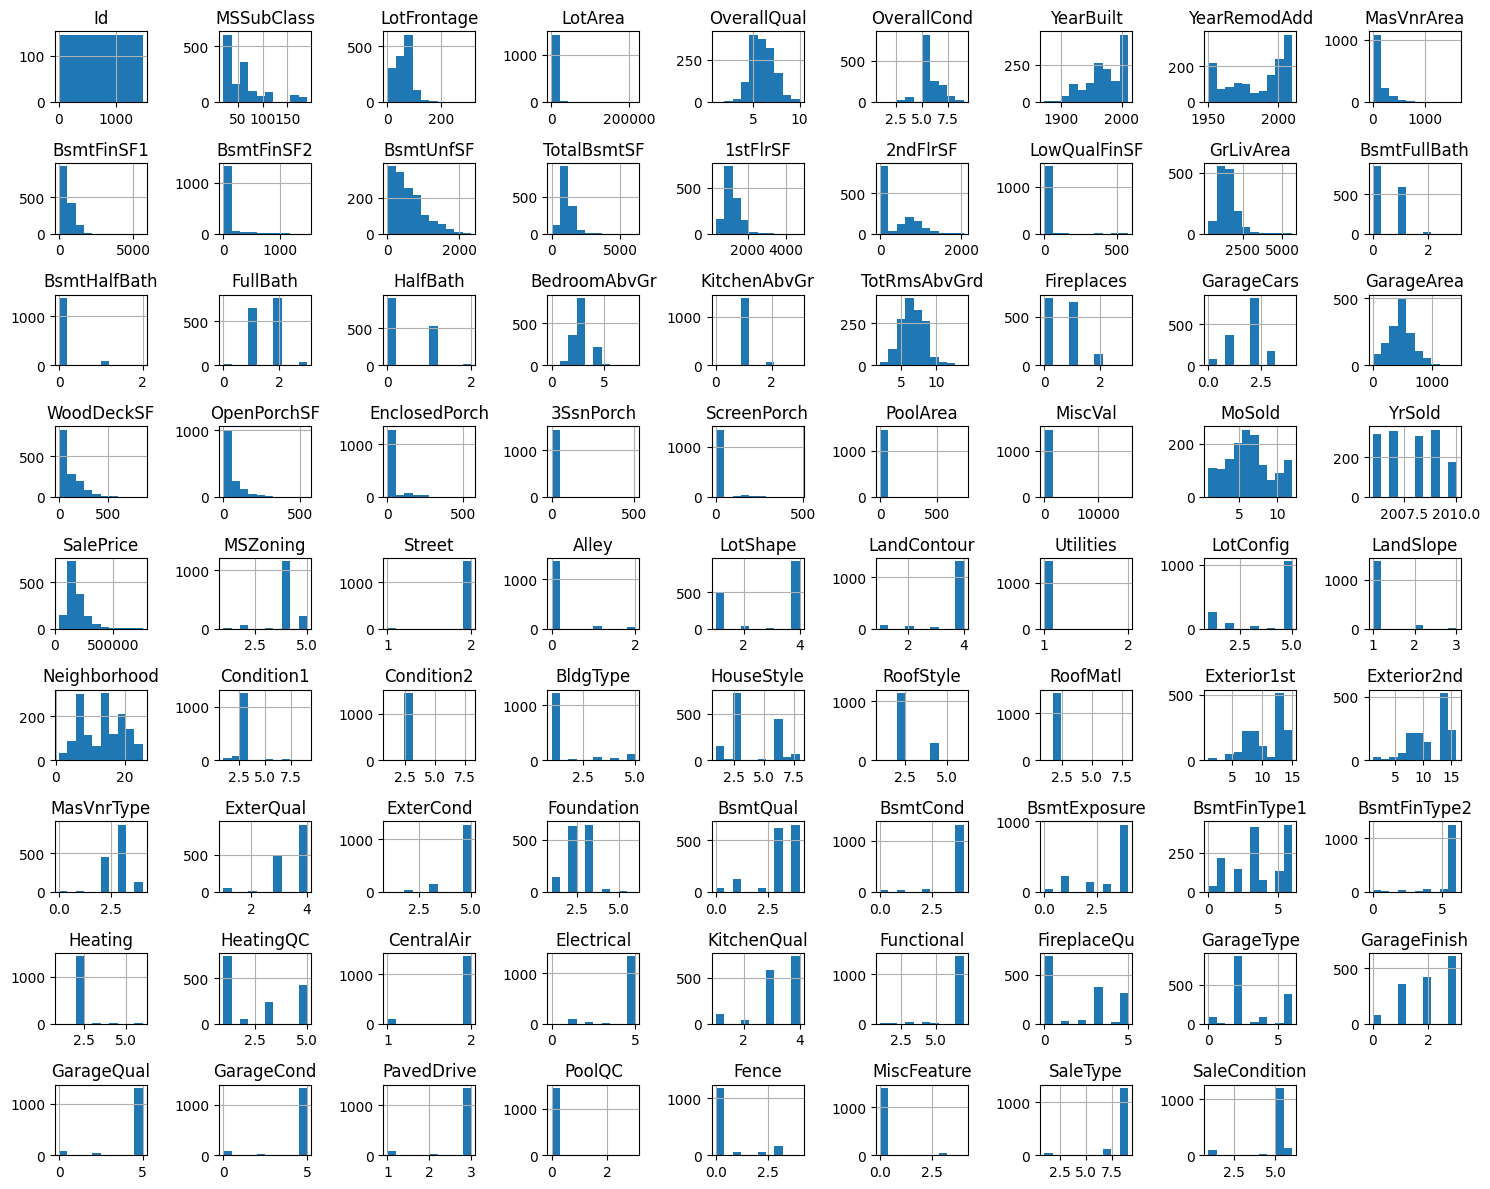

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_test is your DataFrame
df_test.hist(figsize=(15, 12))  # Adjust the figsize according to your preference
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('Id')
numeric_columns.remove('SalePrice')
numeric_columns.remove('GarageYrBlt')
df_test[numeric_columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
df_test["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
topic_keywords = df.columns
lines = []

with open("/content/data_description.txt", "r") as file:
    for line in file:
        if any(keyword in line for keyword in topic_keywords):
            lines.append(line.strip())

for line in lines:
    print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.
MSZoning: Identifies the general zoning classification of the sale.
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
AllPub	All public Utilities (E,G,W,& S)
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to various conditions
Condition2: Proximity to various conditions (if more than one is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Rates the overall material and finish of the house
OverallCond: Rates the overall condition of the house
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
RoofStyle: T

## Train Test Split (Training Purpose)

In [32]:
df_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical'

In [109]:
X = df_test.drop(['Id', 'SalePrice'], axis=1)
y = df_test['SalePrice']

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
minMaxScaler = MinMaxScaler()

In [112]:
X = minMaxScaler.fit_transform(X)

In [114]:
X

array([[0.23529412, 0.20766773, 0.0334198 , ..., 0.        , 1.        ,
        0.8       ],
       [0.        , 0.25559105, 0.03879502, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.2172524 , 0.04650728, ..., 0.        , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.21086262, 0.03618687, ..., 0.75      , 1.        ,
        0.8       ],
       [0.        , 0.2172524 , 0.03934189, ..., 0.        , 1.        ,
        0.8       ],
       [0.        , 0.23961661, 0.04037019, ..., 0.        , 1.        ,
        0.8       ]])

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [115]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X_train

array([[0.        , 0.22364217, 0.0331861 , ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.1884984 , 0.03055458, ..., 0.        , 1.        ,
        0.8       ],
       [0.05882353, 0.21405751, 0.03494823, ..., 0.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.19169329, 0.0321204 , ..., 0.        , 1.        ,
        0.8       ],
       [0.17647059, 0.17571885, 0.02964313, ..., 0.        , 1.        ,
        0.8       ],
       [0.58823529, 0.16932907, 0.01114305, ..., 0.        , 1.        ,
        0.8       ]])

In [117]:
X_test

array([[0.        , 0.22364217, 0.03325154, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.31309904, 0.05120942, ..., 0.        , 1.        ,
        0.8       ],
       [0.05882353, 0.17891374, 0.03580359, ..., 0.        , 1.        ,
        0.8       ],
       ...,
       [0.23529412, 0.20127796, 0.03224661, ..., 0.        , 1.        ,
        0.8       ],
       [0.29411765, 0.19169329, 0.03638318, ..., 0.        , 1.        ,
        0.8       ],
       [0.        , 0.22364217, 0.03187735, ..., 0.        , 1.        ,
        0.8       ]])

## Loading the Test Data (Kaggle)

In [131]:
test = pd.read_csv("/content/test.csv")

In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [133]:
pd.DataFrame({'total_missing': test.isnull().sum(),'data_type': test.dtypes})

,total_missing,data_type
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,227,float64
LotArea,0,int64
...,...,...
MiscVal,0,int64
MoSold,0,int64
YrSold,0,int64
SaleType,1,object


In [134]:
test["SaleType"].fillna("0",inplace=True)
test["Functional"].fillna("0",inplace=True)
test["KitchenQual"].fillna("0",inplace=True)
test["Utilities"].fillna("0",inplace=True)
test["MSZoning"].fillna("0",inplace=True)
test["Exterior1st"].fillna("0",inplace=True)
test["Exterior2nd"].fillna("0",inplace=True)

test["BsmtUnfSF"].fillna(0,inplace=True)
test["GarageArea"].fillna(0,inplace=True)
test["GarageCars"].fillna(0,inplace=True)
test["BsmtFullBath"].fillna(0,inplace=True)
test["BsmtHalfBath"].fillna(0,inplace=True)
test["TotalBsmtSF"].fillna(0,inplace=True)
test["BsmtFinSF1"].fillna(0,inplace=True)
test["BsmtFinSF2"].fillna(0,inplace=True)

In [135]:
test_prep = prepare_dataset(test.copy())

Transform


<ipython-input-106-ecc33dc26803>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dummy_row, ignore_index=True)


In [136]:
test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

In [137]:
test_prep.tail(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,9.0,5.0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,2.0,1.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0


In [138]:
test_data = test_prep.drop('Id',axis=1)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
print('Training score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test, y_test)))

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.875659564672137
Test score: 0.7813469959888069
RMSE: 38266.18778113591


### Testing the LR model

In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
test_data[numeric_columns] = scalerX.transform(test_data[numeric_columns])

In [ ]:
result = lr.predict(test_data)

In [ ]:
submissions = pd.read_csv("/content/sample_submission.csv")

In [ ]:
submissions['SalePrice'] = result

In [ ]:
submissions.to_csv("/content/Lr.csv",index=False)

In [ ]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

In [ ]:
print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

print("""
Given that the training score is perfect (1.0), while the test score is extremely low (-0.8612472230705708),
it is highly likely that the model is overfitting the training data. This means that the model is overly
complex and is not able to generalize well to new data.
      """)

Training score: 1.0
Test score: -0.8612472230705708

Given that the training score is perfect (1.0), while the test score is extremely low (-0.8612472230705708), 
it is highly likely that the model is overfitting the training data. This means that the model is overly 
complex and is not able to generalize well to new data.
      


## L2 Regularisation

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.01, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.01))])

In [ ]:
print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.9999999962932206
Test Score: -0.920485836188788


In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1114,20,90.0,5400,5,7,1954,2000,0.0,415,0,...,6.0,3.0,5.0,5.0,3.0,0.0,3.0,0.0,9.0,5.0
1217,20,72.0,8640,8,5,2009,2009,72.0,936,0,...,2.0,2.0,5.0,5.0,3.0,0.0,0.0,0.0,7.0,6.0
690,120,0.0,4426,6,5,2004,2004,147.0,697,0,...,2.0,2.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,6.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,9.0,1.0
802,60,63.0,8199,7,5,2005,2005,0.0,648,0,...,2.0,1.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,120,50.0,8012,6,5,1992,1992,0.0,430,0,...,2.0,2.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0
677,30,52.0,9022,5,8,1924,2006,0.0,0,0,...,6.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,9.0,5.0
69,50,81.0,15593,7,4,1953,1953,0.0,603,0,...,2.0,1.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0
935,30,52.0,5825,4,5,1926,1953,108.0,0,0,...,6.0,3.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0


## L1 Regularisation

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.9999173257769116
Test score: 0.3437088961173529


## SVM Model - Support Vector Regression

### Standard Scaling the features

In [ ]:
numeric_columns = list(df.select_dtypes(include=[np.number]).columns)

In [ ]:
numeric_columns.remove('Id')
numeric_columns.remove('GarageYrBlt')
numeric_columns.remove('SalePrice')

In [ ]:
print(numeric_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalerX = StandardScaler()
scalerY = StandardScaler()

In [ ]:
X_train[numeric_columns] = scalerX.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scalerX.transform(X_test[numeric_columns])

In [ ]:
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.transform(y_test)

### Training the SVM Algorithm

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
print('Training score: {}'.format(regressor.score(X_train, y_train)))
print('Test score: {}'.format(regressor.score(X_test, y_test)))

Training score: 0.14247592865111736
Test score: 0.15515067945995065


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(f"Mean Squared Error : {mean_squared_error(regressor.predict(X_test),y_test)}")

Mean Squared Error : 4494822604.936692


## Analysing Multiple Models

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
model = LazyRegressor(verbose=1, ignore_warnings=False, random_state = 42 )
models, predictions = model.fit(X_train, X_test, y_train, y_test)

  2%|▏         | 1/42 [00:00<00:13,  2.97it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8438341631085151, 'Adjusted R-Squared': 0.8012434803199283, 'RMSE': 29254.86637933893, 'Time taken': 0.33670973777770996}


 10%|▉         | 4/42 [00:00<00:05,  6.43it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8889337533036201, 'Adjusted R-Squared': 0.8586429587500619, 'RMSE': 24671.533821719448, 'Time taken': 0.21200799942016602}
{'Model': 'BayesianRidge', 'R-Squared': 0.8757793612177369, 'Adjusted R-Squared': 0.8419010051862106, 'RMSE': 26091.67627283585, 'Time taken': 0.05978894233703613}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7680768561395811, 'Adjusted R-Squared': 0.7048250896321941, 'RMSE': 35651.44582508791, 'Time taken': 0.11718893051147461}


 17%|█▋        | 7/42 [00:00<00:03,  9.31it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.0013380287305142513, 'Adjusted R-Squared': -0.2744302183842908, 'RMSE': 74079.0590654615, 'Time taken': 0.026169300079345703}
{'Model': 'ElasticNet', 'R-Squared': 0.8755420923853138, 'Adjusted R-Squared': 0.8415990266722175, 'RMSE': 26116.582714608703, 'Time taken': 0.024202585220336914}
{'Model': 'ElasticNetCV', 'R-Squared': 0.20308400275174565, 'Adjusted R-Squared': -0.014256723770505575, 'RMSE': 66086.29045754716, 'Time taken': 0.1606006622314453}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6296898971207161, 'Adjusted R-Squared': 0.5286962326990932, 'RMSE': 45049.282952984744, 'Time taken': 0.08211922645568848}


 21%|██▏       | 9/42 [00:02<00:11,  2.99it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8949502614177921, 'Adjusted R-Squared': 0.8663003327135536, 'RMSE': 23993.996455588695, 'Time taken': 1.4127750396728516}
{'Model': 'GammaRegressor', 'R-Squared': 0.8944066738238434, 'Adjusted R-Squared': 0.865608493957619, 'RMSE': 24055.99570332761, 'Time taken': 0.039339542388916016}


 26%|██▌       | 11/42 [00:02<00:09,  3.36it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.777296659885904, 'Adjusted R-Squared': -7.625650294400241, 'RMSE': 192722.9126035892, 'Time taken': 0.4060990810394287}


 29%|██▊       | 12/42 [00:03<00:11,  2.62it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9016455739064538, 'Adjusted R-Squared': 0.8748216395173048, 'RMSE': 23216.78377373769, 'Time taken': 0.7300760746002197}


 31%|███       | 13/42 [00:04<00:13,  2.13it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9041526819000422, 'Adjusted R-Squared': 0.8780125042364173, 'RMSE': 22918.96941612967, 'Time taken': 0.7894012928009033}
{'Model': 'HuberRegressor', 'R-Squared': 0.8939325583549327, 'Adjusted R-Squared': 0.8650050742699144, 'RMSE': 24109.94109100881, 'Time taken': 0.08425402641296387}


 38%|███▊      | 16/42 [00:04<00:07,  3.52it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8081779285849862, 'Adjusted R-Squared': 0.7558628181990733, 'RMSE': 32423.089162608576, 'Time taken': 0.12495064735412598}
{'Model': 'KernelRidge', 'R-Squared': -5.0725894770406175, 'Adjusted R-Squared': -6.72875024350624, 'RMSE': 182428.2380928645, 'Time taken': 0.10372567176818848}
{'Model': 'Lars', 'R-Squared': -76993.37432655209, 'Adjusted R-Squared': -97991.84005197539, 'RMSE': 20541615.67271342, 'Time taken': 0.08677482604980469}


 45%|████▌     | 19/42 [00:05<00:04,  4.69it/s]

{'Model': 'LarsCV', 'R-Squared': 0.845627818928387, 'Adjusted R-Squared': 0.8035263149997653, 'RMSE': 29086.376570211345, 'Time taken': 0.1454629898071289}
{'Model': 'Lasso', 'R-Squared': 0.8764682842006795, 'Adjusted R-Squared': 0.8427778162554103, 'RMSE': 26019.223951877644, 'Time taken': 0.18413949012756348}


 48%|████▊     | 20/42 [00:05<00:05,  4.34it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8752097180843256, 'Adjusted R-Squared': 0.8411760048345962, 'RMSE': 26151.4326222801, 'Time taken': 0.2822113037109375}
{'Model': 'LassoLars', 'R-Squared': 0.876467968651845, 'Adjusted R-Squared': 0.8427774146478026, 'RMSE': 26019.257183548136, 'Time taken': 0.0823812484741211}


 57%|█████▋    | 24/42 [00:05<00:02,  7.04it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8756581849070081, 'Adjusted R-Squared': 0.8417467807907375, 'RMSE': 26104.399289020115, 'Time taken': 0.15064001083374023}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8804722405153114, 'Adjusted R-Squared': 0.8478737606558508, 'RMSE': 25594.078154870458, 'Time taken': 0.0777733325958252}
{'Model': 'LinearRegression', 'R-Squared': 0.8764613654529111, 'Adjusted R-Squared': 0.8427690105764323, 'RMSE': 26019.952582278016, 'Time taken': 0.04113936424255371}
{'Model': 'LinearSVR', 'R-Squared': -5.768064216493652, 'Adjusted R-Squared': -7.613899911901012, 'RMSE': 192591.59846374186, 'Time taken': 0.04167890548706055}


 62%|██████▏   | 26/42 [00:08<00:08,  1.93it/s]

{'Model': 'MLPRegressor', 'R-Squared': -5.637998634749618, 'Adjusted R-Squared': -7.448361898772241, 'RMSE': 190732.0522463488, 'Time taken': 2.441911458969116}


 69%|██████▉   | 29/42 [00:08<00:04,  3.18it/s]

{'Model': 'NuSVR', 'R-Squared': -0.006886546498775736, 'Adjusted R-Squared': -0.2814919682711692, 'RMSE': 74284.01540749929, 'Time taken': 0.22510123252868652}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8372424765488131, 'Adjusted R-Squared': 0.7928540610621257, 'RMSE': 29865.90221524786, 'Time taken': 0.03648257255554199}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8372424765488131, 'Adjusted R-Squared': 0.7928540610621257, 'RMSE': 29865.90221524786, 'Time taken': 0.062326908111572266}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.891409958766685, 'Adjusted R-Squared': 0.861794492975781, 'RMSE': 24394.95949668628, 'Time taken': 0.3325324058532715}


 74%|███████▍  | 31/42 [00:09<00:04,  2.56it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.895413824884688, 'Adjusted R-Squared': 0.866890322580512, 'RMSE': 23940.99757102629, 'Time taken': 0.7378714084625244}


 76%|███████▌  | 32/42 [00:56<01:33,  9.38s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.043219585964689555, 'Adjusted R-Squared': -0.327734018500514, 'RMSE': 75612.39047476307, 'Time taken': 46.49504494667053}


 79%|███████▊  | 33/42 [00:56<01:07,  7.49s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8363796960840193, 'Adjusted R-Squared': 0.7917559768342064, 'RMSE': 29944.957419219027, 'Time taken': 0.6757879257202148}


 81%|████████  | 34/42 [00:58<00:49,  6.15s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9089088033670366, 'Adjusted R-Squared': 0.8840657497398647, 'RMSE': 22343.093658258236, 'Time taken': 1.8407247066497803}
{'Model': 'Ridge', 'R-Squared': 0.8763988355720161, 'Adjusted R-Squared': 0.842689427091657, 'RMSE': 26026.536833073966, 'Time taken': 0.021181106567382812}
{'Model': 'RidgeCV', 'R-Squared': 0.8760846579073441, 'Adjusted R-Squared': 0.8422895646093471, 'RMSE': 26059.593831403967, 'Time taken': 0.03302168846130371}
{'Model': 'SGDRegressor', 'R-Squared': 0.8600032612458329, 'Adjusted R-Squared': 0.8218223324946965, 'RMSE': 27698.998182558018, 'Time taken': 0.03582191467285156}


 90%|█████████ | 38/42 [00:59<00:10,  2.65s/it]

{'Model': 'SVR', 'R-Squared': -0.042147891723140374, 'Adjusted R-Squared': -0.32637004401126957, 'RMSE': 75573.54238058403, 'Time taken': 0.20163464546203613}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8764613654529111, 'Adjusted R-Squared': 0.8427690105764323, 'RMSE': 26019.952582278016, 'Time taken': 0.038047075271606445}


 95%|█████████▌| 40/42 [00:59<00:03,  1.93s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.866024061257536, 'Adjusted R-Squared': 0.8294851688732275, 'RMSE': 27096.83125215687, 'Time taken': 0.2932908535003662}


 98%|█████████▊| 41/42 [01:00<00:01,  1.71s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9121947262813174, 'Adjusted R-Squared': 0.8882478334489494, 'RMSE': 21936.402335097886, 'Time taken': 0.664750337600708}


100%|██████████| 42/42 [01:00<00:00,  1.44s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9044476642563006, 'Adjusted R-Squared': 0.8783879363262008, 'RMSE': 22883.674211849186, 'Time taken': 0.2948915958404541}


In [ ]:
models.sort_values(by = 'R-Squared', ascending = False)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.89,0.91,21936.40,0.66
RandomForestRegressor,0.88,0.91,22343.09,1.84
LGBMRegressor,0.88,0.90,22883.67,0.29
HistGradientBoostingRegressor,0.88,0.90,22918.97,0.79
GradientBoostingRegressor,0.87,0.90,23216.78,0.73
PoissonRegressor,0.87,0.90,23941.00,0.74
ExtraTreesRegressor,0.87,0.89,23994.00,1.41
GammaRegressor,0.87,0.89,24056.00,0.04
HuberRegressor,0.87,0.89,24109.94,0.08


## Gradient Boosting - XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize the XGBRegressor model and tune the parameters.
model = xgb.XGBRegressor(
          n_estimators = 1000,
          max_depth = 6,
          learning_rate = 0.01,
        )

In [ ]:
dir(model)

In [ ]:
print(model.reg_alpha)

None


In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["rmse", "mae"]

In [ ]:
# Train the model
model.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-rmse:195316.07864	validation_0-mae:179654.00884	validation_1-rmse:197318.90242	validation_1-mae:177096.13341
[1]	validation_0-rmse:193457.50936	validation_0-mae:177885.49547	validation_1-rmse:195521.86808	validation_1-mae:175367.13388
[2]	validation_0-rmse:191617.34239	validation_0-mae:176136.05321	validation_1-rmse:193752.13344	validation_1-mae:173665.57083
[3]	validation_0-rmse:189796.34976	validation_0-mae:174402.57859	validation_1-rmse:192003.73477	validation_1-mae:171982.84929
[4]	validation_0-rmse:187993.96863	validation_0-mae:172684.59486	validation_1-rmse:190257.98679	validation_1-mae:170297.28320
[5]	validation_0-rmse:186206.43701	validation_0-mae:170988.93298	validation_1-rmse:188501.07882	validation_1-mae:168630.21605
[6]	validation_0-rmse:184439.03957	validation_0-mae:169310.39356	validation_1-rmse:186788.61677	validation_1-mae:166985.47957
[7]	validation_0-rmse:182686.91495	validation_0-mae:167649.36168	validation_1-rmse:185052.44362	validation_1-mae:16534

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:167692.45964	validation_0-mae:153418.35992	validation_1-rmse:170554.37676	validation_1-mae:151431.03589
[17]	validation_0-rmse:166106.66823	validation_0-mae:151912.78130	validation_1-rmse:168978.77924	validation_1-mae:149928.42769
[18]	validation_0-rmse:164539.47051	validation_0-mae:150422.95440	validation_1-rmse:167485.02673	validation_1-mae:148487.05473
[19]	validation_0-rmse:162985.13179	validation_0-mae:148951.05791	validation_1-rmse:165996.39910	validation_1-mae:147045.46904
[20]	validation_0-rmse:161448.70868	validation_0-mae:147490.29268	validation_1-rmse:164520.85732	validation_1-mae:145613.66695
[21]	validation_0-rmse:159922.11502	validation_0-mae:146046.73008	validation_1-rmse:163072.93378	validation_1-mae:144218.85695
[22]	validation_0-rmse:158417.04628	validation_0-mae:144612.85403	validation_1-rmse:161600.50728	validation_1-mae:142809.83637
[23]	validation_0-rmse:156920.69117	validation_0-mae:143196.14466	validation_1-rmse:160178.10925	validation_1-m

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

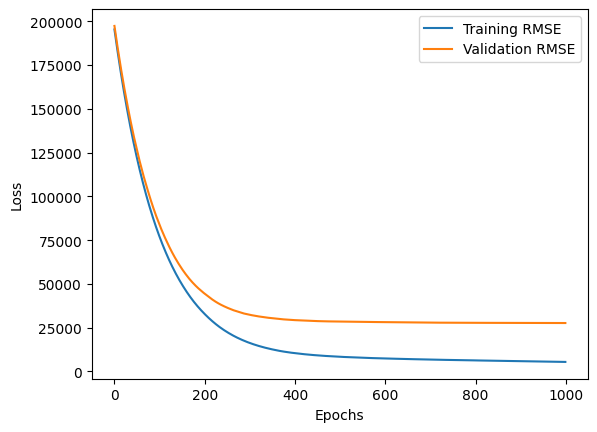

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss (RMSE)
plt.plot(model.evals_result_['validation_0']['rmse'], label='Training RMSE')
plt.plot(model.evals_result_['validation_1']['rmse'], label='Validation RMSE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

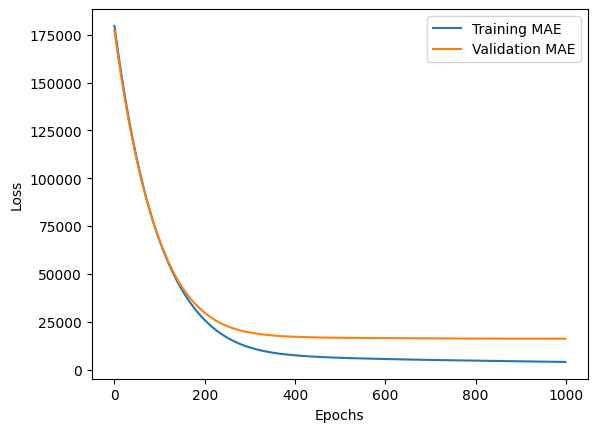

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss (MAE)
plt.plot(model.evals_result_['validation_0']['mae'], label='Training MAE')
plt.plot(model.evals_result_['validation_1']['mae'], label='Validation MAE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Root Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train, squared=False))
print("Root Mean Squared Error (Test):", rmse)

Root Mean Squared Error (Train): 5467.6759274921305
Root Mean Squared Error (Test): 27677.246179550075


In [ ]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

"""
Learning Rate: None
Training score: 0.9997570873515093
Test score: 0.8899040990362022
"""

"""
Learning Rate: 0.01
Training score: 0.9987718414500512
Test score: 0.8994081262638551
"""

Training score: 0.9949878065998954
Test score: 0.9001307199470022


'\nLearning Rate: 0.01\nTraining score: 0.9987718414500512\nTest score: 0.8994081262638551\n'

## Grid Search over a range of parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid of hyperparameters to search over
param_grid_gb = {'learning_rate': [0.01],
              'n_estimators' : [1000],
              'max_depth' : [4,5,6],
              'subsample' : [0.3,0.5,0.9],
              'colsample_bytree' : [0.3,0.5,0.9],
              'alpha': [0.1,0.4,0.8]}

In [ ]:
# Regressor Instantiation
gb = xgb.XGBRegressor()

mse_grid = GridSearchCV(estimator = gb, param_grid = param_grid_gb,cv =2 , scoring = ["neg_mean_absolute_error",'neg_mean_squared_error','neg_root_mean_squared_error'], verbose = 1,refit=False,n_jobs = -1)

mse_grid.fit(X_train,y_train)


Fitting 2 folds for each of 81 candidates, totalling 162 fits


AttributeError: ignored

In [ ]:
pd.DataFrame(mse_grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_colsample_bytree', 'param_learning_rate',
       'param_max_depth', 'param_n_estimators', 'param_subsample', 'params',
       'split0_test_neg_mean_absolute_error',
       'split1_test_neg_mean_absolute_error',
       'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
       'rank_test_neg_mean_absolute_error',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error',
       'rank_test_neg_mean_squared_error',
       'split0_test_neg_root_mean_squared_error',
       'split1_test_neg_root_mean_squared_error',
       'mean_test_neg_root_mean_squared_error',
       'std_test_neg_root_mean_squared_error',
       'rank_test_neg_root_mean_squared_error'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
# Get the index of the best combination of hyperparameters based on mean absolute error
best_index = np.argmax(mse_grid.cv_results_['mean_test_neg_mean_absolute_error'])

# Get the best combination of hyperparameters
best_params = mse_grid.cv_results_['params'][best_index]

In [ ]:
best_params

{'alpha': 0.8,
 'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000,
 'subsample': 0.3}

In [ ]:
#best parameters based on rmse

rmse_index = np.argmax(mse_grid.cv_results_['mean_test_neg_root_mean_squared_error'])
mse_grid.cv_results_['params'][rmse_index]

{'alpha': 0.8,
 'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000,
 'subsample': 0.5}

In [ ]:
print("RMSE at best RMSE "+str(mse_grid.cv_results_['mean_test_neg_root_mean_squared_error'][rmse_index]))
print("MAE at best RMSE "+str(mse_grid.cv_results_['mean_test_neg_mean_absolute_error'][rmse_index]))

print("MAE at best MAE "+str(mse_grid.cv_results_['mean_test_neg_mean_absolute_error'][best_index]))
print("RMSE at best MAE "+str(mse_grid.cv_results_['mean_test_neg_root_mean_squared_error'][best_index]))

RMSE at best RMSE -27788.706860940358
MAE at best RMSE -15564.064921339897
MAE at best MAE -15388.713800299658
RMSE at best MAE -28014.132007046213


## Generating the submission file

In [129]:
import pandas as pd

def generateSubmissionFile(test_data: pd.DataFrame, model, fileName: str = "Kaggle_Submission"):
    """
    Generate the submission CSV file for Kaggle.

    Args:
        test_data (pd.DataFrame): DataFrame containing the test data.
        model: Model object used for prediction.
        fileName (str, optional): Name for saving the file. Defaults to "Kaggle_Submission".

    Returns:
        pd.DataFrame: Submission DataFrame object.
    """

    # Read the sample submission CSV file
    submission = pd.read_csv("sample_submission.csv")

    # Predict the SalePrice using the provided model
    submission['SalePrice'] = model.predict(test_data)

    # Save the submission DataFrame to a CSV file
    submission.to_csv(fileName + ".csv", index=False)

    return submission

## Fine Tuning XGBRegressor - 1

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
param1 = {'alpha': 0.8,
          'colsample_bytree': 0.3,
          'learning_rate': 0.01,
          'max_depth': 4,
          'n_estimators': 1000,
          'subsample': 0.5
          }

In [ ]:
# Initialize the XGBRegressor model and adjusting the parameters.
model = xgb.XGBRegressor(**param1)

In [ ]:
#evaluation set during training for validating the model

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["rmse", "mae"]

In [ ]:
# Train the model
model.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-rmse:195352.05793	validation_0-mae:179655.60941	validation_1-rmse:197327.12063	validation_1-mae:177090.94661
[1]	validation_0-rmse:193544.24153	validation_0-mae:177891.60833	validation_1-rmse:195566.70093	validation_1-mae:175349.00359
[2]	validation_0-rmse:191744.78766	validation_0-mae:176155.96734	validation_1-rmse:193808.20555	validation_1-mae:173651.11526
[3]	validation_0-rmse:189950.04407	validation_0-mae:174422.51072	validation_1-rmse:192035.68528	validation_1-mae:171948.64854
[4]	validation_0-rmse:188187.02273	validation_0-mae:172727.00446	validation_1-rmse:190315.98135	validation_1-mae:170280.10536
[5]	validation_0-rmse:186428.33462	validation_0-mae:171030.41582	validation_1-rmse:188611.04772	validation_1-mae:168626.68495
[6]	validation_0-rmse:184678.01540	validation_0-mae:169347.37781	validation_1-rmse:186891.73427	validation_1-mae:166978.83081
[7]	validation_0-rmse:182972.22274	validation_0-mae:167691.01684	validation_1-rmse:185202.71529	validation_1-mae:16532

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:160702.06942	validation_0-mae:146055.06366	validation_1-rmse:163341.82478	validation_1-mae:144009.61033
[22]	validation_0-rmse:159264.15403	validation_0-mae:144627.42442	validation_1-rmse:161935.81135	validation_1-mae:142601.19778
[23]	validation_0-rmse:157781.84882	validation_0-mae:143189.44840	validation_1-rmse:160485.93017	validation_1-mae:141181.60940
[24]	validation_0-rmse:156343.68925	validation_0-mae:141781.41931	validation_1-rmse:159074.01311	validation_1-mae:139801.60309
[25]	validation_0-rmse:154937.58794	validation_0-mae:140392.25996	validation_1-rmse:157661.75953	validation_1-mae:138394.09347
[26]	validation_0-rmse:153502.42342	validation_0-mae:139012.73528	validation_1-rmse:156259.59556	validation_1-mae:137039.04698
[27]	validation_0-rmse:152123.29443	validation_0-mae:137652.72973	validation_1-rmse:154899.51981	validation_1-mae:135682.91571
[28]	validation_0-rmse:150707.02372	validation_0-mae:136287.95024	validation_1-rmse:153491.86279	validation_1-m

XGBRegressor(alpha=0.8, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

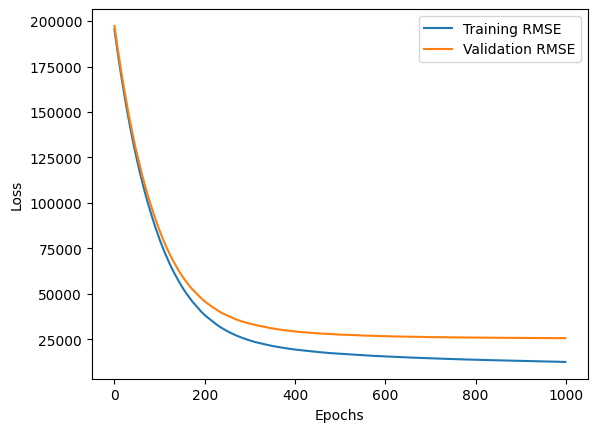

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss (RMSE)
plt.plot(model.evals_result_['validation_0']['rmse'], label='Training RMSE')
plt.plot(model.evals_result_['validation_1']['rmse'], label='Validation RMSE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

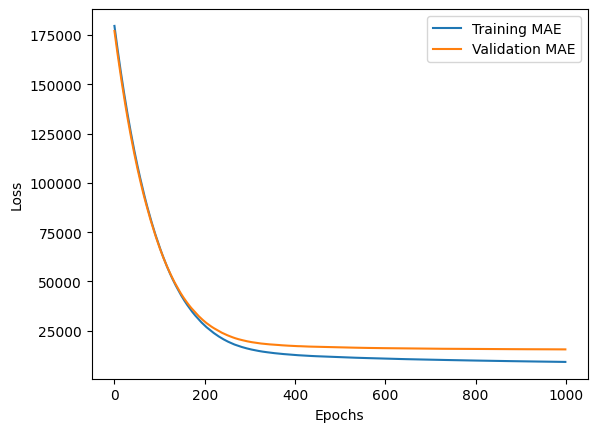

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss (MAE)
plt.plot(model.evals_result_['validation_0']['mae'], label='Training MAE')
plt.plot(model.evals_result_['validation_1']['mae'], label='Validation MAE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Root Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train, squared=False))
print("Root Mean Squared Error (Test):", rmse)

Root Mean Squared Error (Train): 12614.752650973796
Root Mean Squared Error (Test): 25677.357159506817


In [ ]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

# """
# Learning Rate: None
# Training score: 0.9997570873515093
# Test score: 0.8899040990362022
# """

# """
# Learning Rate: 0.01
# Training score: 0.9987718414500512
# Test score: 0.8994081262638551
# """

Training score: 0.9733203721465803
Test score: 0.9140418995375863


In [ ]:
generateSubmissionFile(test_data,model,"XGBoostOptimised")

,Id,SalePrice
0,1461,125156.390625
1,1462,155459.218750
2,1463,179611.890625
3,1464,190491.468750
4,1465,203304.234375
...,...,...
1454,2915,84538.156250
1455,2916,89250.187500
1456,2917,180189.000000
1457,2918,119378.203125


In [ ]:
!kaggle competitions submit -c "house-prices-advanced-regression-techniques" -f "/content/XGBoostOptimised.csv" -m "Optimised XGBoost"

100% 21.2k/21.2k [00:00<00:00, 36.6kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [ ]:
import pickle

In [ ]:
from datetime import date

# Returns the current local date
today = date.today()

In [ ]:
pickle.dump(model,open(f"/content/drive/MyDrive/Kaggle/XGBoost-Optimised-{today}.pkl","wb"))

In [ ]:
model.save_model(f'XGBoost-Optimised-{today}.json')

## Fine Tuning XGBRegressor - 2 (MinMax Scaled Features)

In [118]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [145]:
param1 = {'alpha': 0.8,
          'colsample_bytree': 0.3,
          'learning_rate': 0.01,
          'max_depth': 4,
          'n_estimators': 1200,
          'subsample': 0.5
          }

In [146]:
# Initialize the XGBRegressor model and adjusting the parameters.
model = xgb.XGBRegressor(**param1)

In [147]:
#evaluation set during training for validating the model

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["rmse", "mae"]

In [148]:
# Train the model
model.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-rmse:195352.05793	validation_0-mae:179655.60941	validation_1-rmse:197327.12063	validation_1-mae:177090.94661
[1]	validation_0-rmse:193544.24153	validation_0-mae:177891.60833	validation_1-rmse:195566.70093	validation_1-mae:175349.00359
[2]	validation_0-rmse:191744.78766	validation_0-mae:176155.96734	validation_1-rmse:193808.20555	validation_1-mae:173651.11526
[3]	validation_0-rmse:189953.36391	validation_0-mae:174424.01890	validation_1-rmse:192044.28922	validation_1-mae:171954.68139
[4]	validation_0-rmse:188190.36692	validation_0-mae:172728.51268	validation_1-rmse:190324.55270	validation_1-mae:170286.13821
[5]	validation_0-rmse:186431.65933	validation_0-mae:171031.89669	validation_1-rmse:188619.60037	validation_1-mae:168632.69761
[6]	validation_0-rmse:184681.29685	validation_0-mae:169348.83002	validation_1-rmse:186900.20230	validation_1-mae:166984.81126
[7]	validation_0-rmse:182975.46241	validation_0-mae:167692.44383	validation_1-rmse:185211.10622	validation_1-mae:16532

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:150710.72993	validation_0-mae:136290.12230	validation_1-rmse:153499.62882	validation_1-mae:134331.93350
[29]	validation_0-rmse:149341.57203	validation_0-mae:134962.38085	validation_1-rmse:152168.37717	validation_1-mae:133028.19147
[30]	validation_0-rmse:147974.36909	validation_0-mae:133630.83175	validation_1-rmse:150838.12281	validation_1-mae:131729.84907
[31]	validation_0-rmse:146618.51242	validation_0-mae:132314.38611	validation_1-rmse:149510.33071	validation_1-mae:130443.91313
[32]	validation_0-rmse:145285.26404	validation_0-mae:131014.69224	validation_1-rmse:148202.23002	validation_1-mae:129167.04738
[33]	validation_0-rmse:143977.31776	validation_0-mae:129731.62648	validation_1-rmse:146942.09254	validation_1-mae:127916.51620
[34]	validation_0-rmse:142671.22328	validation_0-mae:128456.78851	validation_1-rmse:145646.27421	validation_1-mae:126648.79330
[35]	validation_0-rmse:141415.23110	validation_0-mae:127226.65446	validation_1-rmse:144412.89667	validation_1-m

XGBRegressor(alpha=0.8, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1200, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

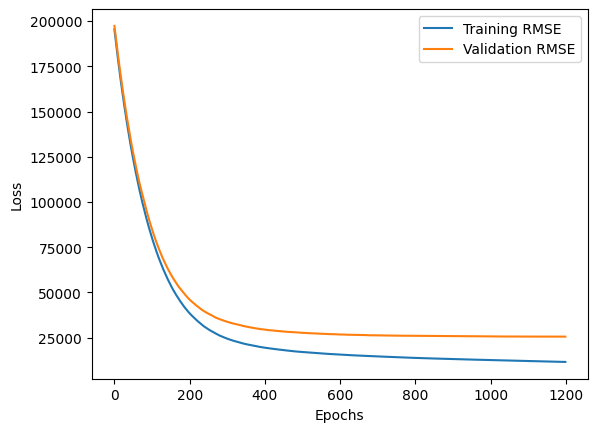

In [149]:
import matplotlib.pyplot as plt

# Plot training loss (RMSE)
plt.plot(model.evals_result_['validation_0']['rmse'], label='Training RMSE')
plt.plot(model.evals_result_['validation_1']['rmse'], label='Validation RMSE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
np.gradient(y, model.evals_result_['validation_0']['rmse'][0])

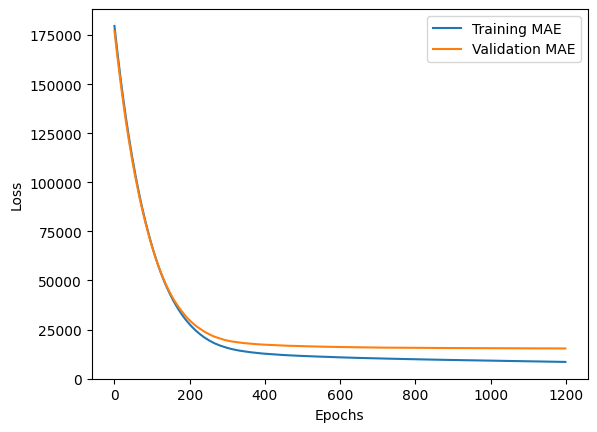

In [150]:
import matplotlib.pyplot as plt

# Plot training loss (MAE)
plt.plot(model.evals_result_['validation_0']['mae'], label='Training MAE')
plt.plot(model.evals_result_['validation_1']['mae'], label='Validation MAE')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [152]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [153]:
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Root Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train, squared=False))
print("Root Mean Squared Error (Test):", rmse)

#Before Scaling
# Root Mean Squared Error (Train): 12614.752650973796
# Root Mean Squared Error (Test): 25677.357159506817

#After Scaling
# Root Mean Squared Error (Train): 12592.504939168579
# Root Mean Squared Error (Test): 25654.416454771053

Root Mean Squared Error (Train): 11566.839882008526
Root Mean Squared Error (Test): 25550.52141600914


In [154]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

# """
# Learning Rate: None
# Training score: 0.9997570873515093
# Test score: 0.8899040990362022
# """

# """
# Learning Rate: 0.01
# Training score: 0.9987718414500512
# Test score: 0.8994081262638551
# """

#Before Scaling
# Training score: 0.9733203721465803
# Test score: 0.9140418995375863

#After Scaling
# Training score: 0.9734143949591241
# Test score: 0.914195424567714

Training score: 0.9775688398391613
Test score: 0.9148889985906677


In [155]:
generateSubmissionFile(minMaxScaler.transform(test_data),model,"XGBoostOptimised-Feature-Transformed-1200-Epochs")

,Id,SalePrice
0,1461,124324.960938
1,1462,155943.625000
2,1463,180796.468750
3,1464,191546.703125
4,1465,201695.296875
...,...,...
1454,2915,83224.539062
1455,2916,87958.398438
1456,2917,181735.906250
1457,2918,119711.015625


In [156]:
!kaggle competitions submit -c "house-prices-advanced-regression-techniques" -f "/content/XGBoostOptimised-Feature-Transformed-1200-Epochs.csv" -m "Optimised XGBoost with Scaled Features & 1200 Epochs"

100% 21.2k/21.2k [00:01<00:00, 15.3kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [142]:
import pickle

In [143]:
from datetime import date

# Returns the current local date
today = date.today()

In [144]:
pickle.dump(model,open(f"/content/drive/MyDrive/Kaggle/XGBoost-Optimised-Features-Scaled-{today}.pkl","wb"))

In [ ]:
model.save_model(f'XGBoost-Optimised-{today}.json')